Linear

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def create_mask_linear(xs, xt, lamb):
    n = len(xs)
    m = len(xt)
    M = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            if (i > j * n / m - lamb) & (i < j * n / m + lamb):
                M[i][j] = 1
    plt.imshow(M, cmap="viridis")
    plt.colorbar()
    plt.show()
    return M

Nonlinear

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
def create_neighbor_relationship(xs):
    xs = np.array(xs)
    if xs.ndim == 1:
        xt = np.insert(xs, 0, np.zeros_like(xs[0]))[:-1]
        f = xs - xt
        f = f.reshape(-1, 1)
    else:
        xt = np.vstack((np.zeros_like(xs[0]), xs))[:-1]
        f = xs - xt
    d = np.linalg.norm(f, axis=1)
    f1 = np.cumsum(d)
    sum_dist = f1[len(f1) - 1]
    return f1 / sum_dist
def create_mask_non_linear(xs, xt, ratio=0.1, sigma=1, type=1):
    f1 = create_neighbor_relationship(xs)
    f2 = create_neighbor_relationship(xt)
    n = len(f1)
    m = len(f2)
    mid_para = np.sqrt((1 / (n**2) + 1 / (m**2)))
    KL = np.abs(np.subtract.outer(f1, f2)) / mid_para
    KL = np.exp(-(np.power(KL, 2)) / 2 * np.power(sigma, 2)) / (
        sigma * np.sqrt(2 * np.pi)
    )
    flattened_list = KL.flatten()
    sorted_list = sorted(flattened_list)
    pivot = sorted_list[math.floor((1 - ratio) * len(sorted_list))]
    M = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            if KL[i][j] > pivot:
                M[i][j] = 1
    plt.imshow(M, cmap="viridis")
    plt.colorbar()
    plt.show()
    return M

# 1. Masking Map Linear

In [16]:
sequence_1 = np.random.rand(100)
sequence_2 = np.random.rand(130)

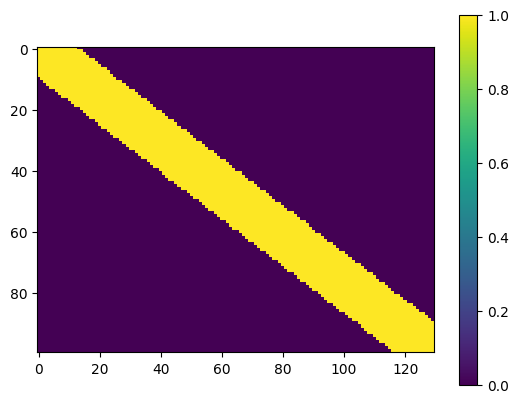

In [17]:
M1 = create_mask_linear(sequence_1, sequence_2, lamb=10)

# 2. Masking Map Non Linear

## 2.1. Create mock data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
def create_mock_data(mean1=50, std_dev1=10, mean2=30, std_dev2=5, max_x=100, point_num=100, plot=False):
    x = np.linspace(0, max_x, point_num)  

    data1 = np.exp(-0.5 * ((x - mean1) / std_dev1) ** 2)
    data2 = np.exp(-0.5 * ((x - mean2) / std_dev2) ** 2)

    max_height = max(np.max(data1), np.max(data2))
    data2 *= max_height / np.max(data2)

    if plot:
        plt.figure(figsize=(8, 5))

        plt.plot(x, data1, color='red')
        plt.plot(x, data2, color='blue')

        plt.xlabel('Time point')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    return data2, data1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


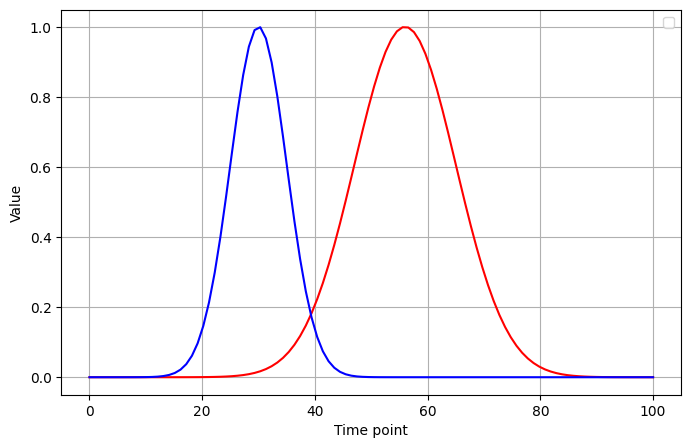

In [19]:
sequence_1, sequence_2 = create_mock_data(mean1=56, std_dev1=9 , mean2=30, std_dev2=5, plot=True)

## 2.2. Draw masking map

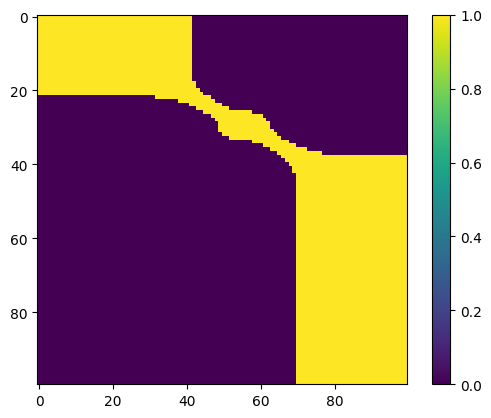

In [20]:
M2 = create_mask_non_linear(sequence_1, sequence_2, ratio=0.3)

# 3. Two maps

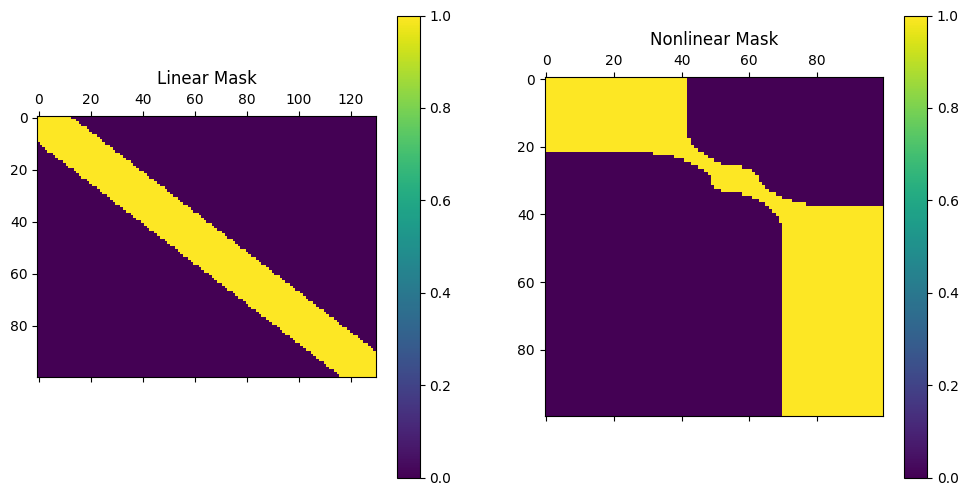

In [22]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cax1 = ax1.matshow(M1, cmap='viridis')
fig.colorbar(cax1, ax=ax1)
ax1.set_title('Linear Mask')

cax2 = ax2.matshow(M2, cmap='viridis')
fig.colorbar(cax2, ax=ax2)
ax2.set_title('Nonlinear Mask')

plt.show()


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0, 1]
for i in range:
    row = (i) // 4
    col = (i) % 4
    getSensitivityExperimentMultivariateResultK(ratio = ratio, value=i, sensitivity_link=sensitivity_link, dataset=dataset, multi_plot=True, axs=axs, row=row, col=col)